<a href="https://colab.research.google.com/github/hkyoo52/CV/blob/main/%EC%8B%9C%EA%B0%81%ED%99%94_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn

- Categorical API
- Distribution API
- Relational API
- Regression API
- Matrix API

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
student = pd.read_csv('/content/drive/MyDrive/부스트캠프/시각화/StudentsPerformance.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


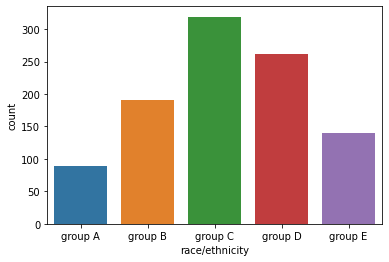

In [ ]:
# 알파벳 순서대로 정렬
sns.countplot(x='race/ethnicity',data=student,
             order=sorted(student['race/ethnicity'].unique())
             
             )

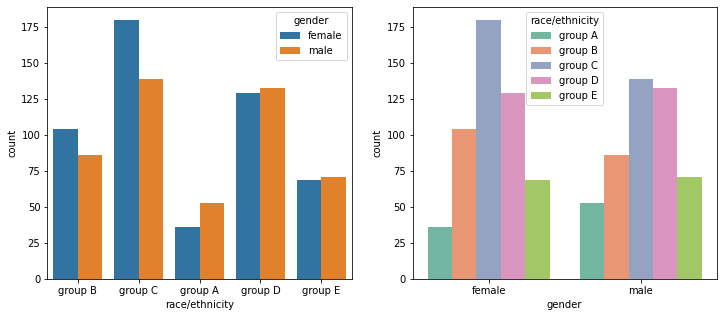

In [ ]:
# ax 사용해서 한번에 여러 그래프 보여줌
# hue를 사용해서 각 요소 한번에 보여줌

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='race/ethnicity',data=student,
              hue='gender', 
              ax=axes[0]
             )

sns.countplot(x='gender',data=student,
              hue='race/ethnicity', 
              hue_order=sorted(student['race/ethnicity'].unique()), 
              palette='Set2',       # palette를 사용해서 cutomize 해줌
              ax=axes[1]
             )

plt.show()

## Categorical API


### boxplot
* 상자 중간은 평균값
* 박스는 25%와 75% 사이로 칠해줌
* box 길이의 1.5배만큼 너비를 줌(IQR 값)
* 그 외의 값은 이상치라고 여김

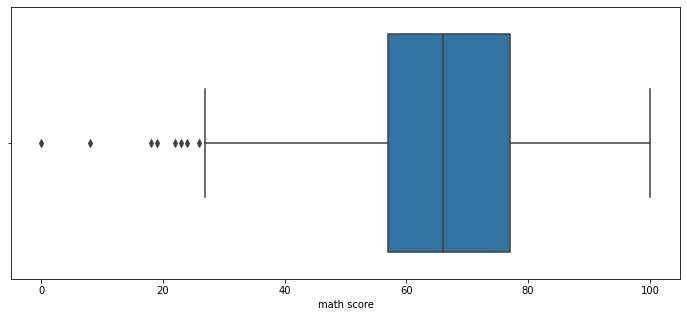

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 5))
sns.boxplot(x='math score', data=student, ax=ax)
plt.show()

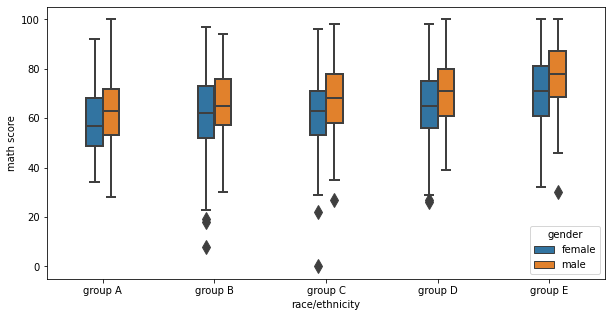

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

sns.boxplot(x='race/ethnicity', y='math score', data=student,
            hue='gender', 
            order=sorted(student['race/ethnicity'].unique()),
            width=0.3,
            linewidth=2,
            fliersize=10,
            ax=ax)

plt.show()

### Violin Plot
* 가운데 흰 점이 중간값
* 검은 막대가 IQR 범위


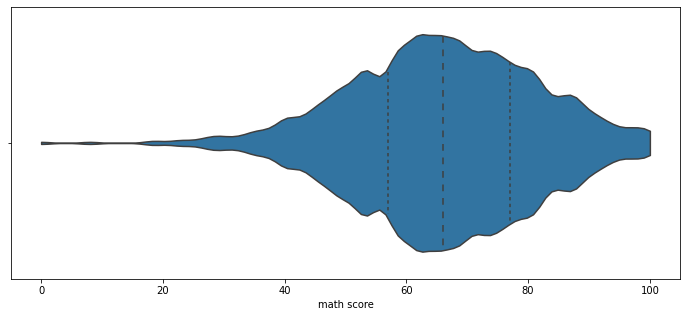

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 5))
sns.violinplot(x='math score', data=student, ax=ax,
               bw=0.1,          # 분포를 얼마나 자세히 보여줄 것인가
               cut=0,           # 끝부분을 얼마나 자를건가
               inner='quartile' # 내부 값은 어떻게 표현? Ex. "box”,“quartile”, “point”, “stick”, None
              )
plt.show()

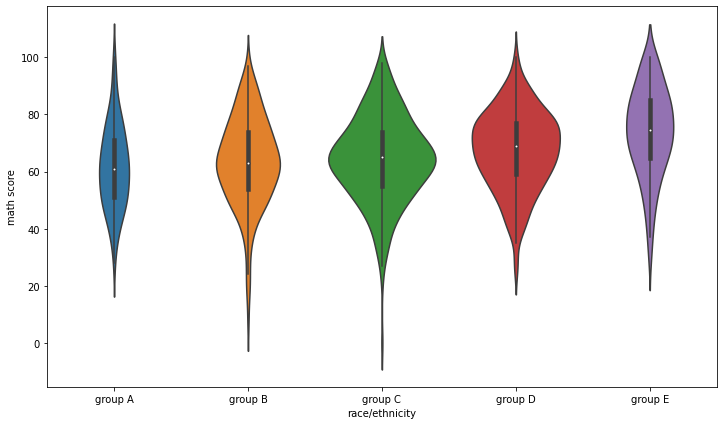

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
sns.violinplot(x='race/ethnicity', y='math score', data=student, ax=ax,
               order=sorted(student['race/ethnicity'].unique()),
               scale='count'
              )
plt.show()

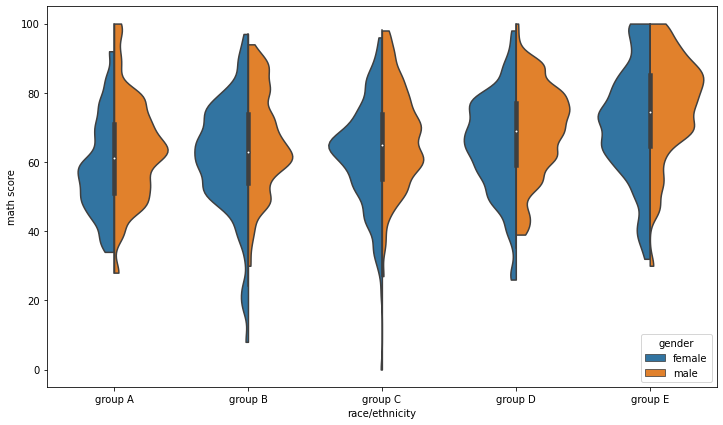

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
sns.violinplot(x='race/ethnicity', y='math score', data=student, ax=ax,
               order=sorted(student['race/ethnicity'].unique()),
               hue='gender',
               scale='count',     # biolin 종류
               split=True,        # 동시에 비교할 것인가
               bw=0.2, cut=0
              )
plt.show()

## ETC

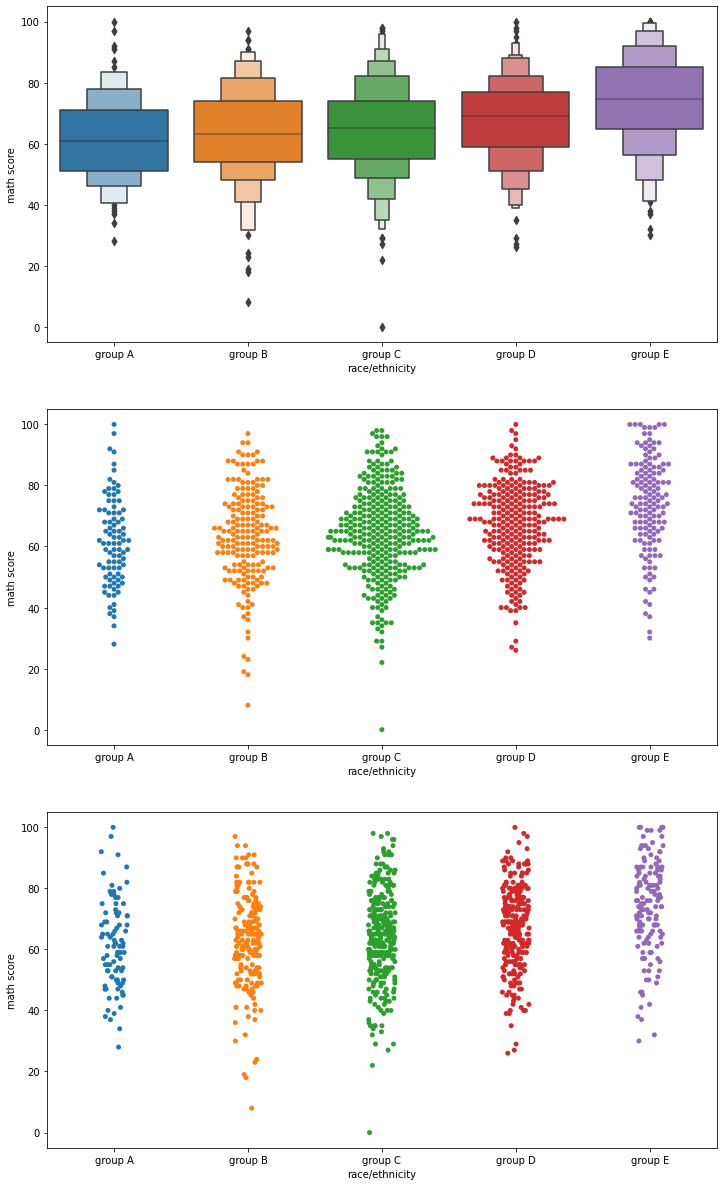

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(12, 21))
sns.boxenplot(x='race/ethnicity', y='math score', data=student, ax=axes[0],
               order=sorted(student['race/ethnicity'].unique()))

sns.swarmplot(x='race/ethnicity', y='math score', data=student, ax=axes[1],
               order=sorted(student['race/ethnicity'].unique()))

sns.stripplot(x='race/ethnicity', y='math score', data=student, ax=axes[2],
               order=sorted(student['race/ethnicity'].unique()))
plt.show()

## Distribution

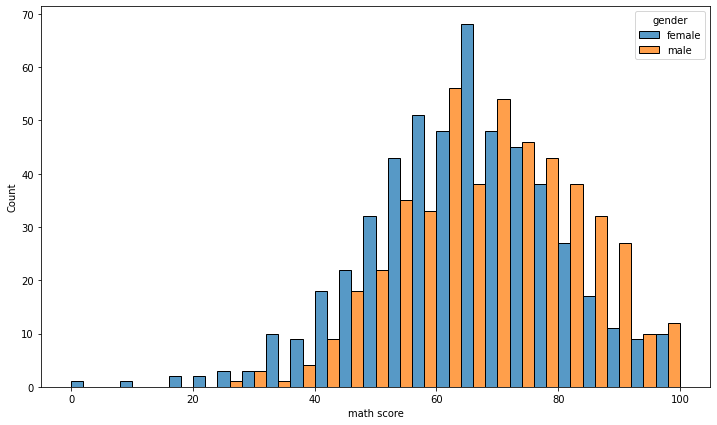

In [ ]:
# 히스토그램

fig, ax = plt.subplots(figsize=(12, 7))

sns.histplot(x='math score', data=student, ax=ax,
             hue='gender', 
             multiple='dodge', # layer, dodge, stack, fill
#              binwidth=50,         # 막대 너비
#              bins=100,            # 막대 개수   binwidth와 bins 중 한개만 사용
            )

plt.show()

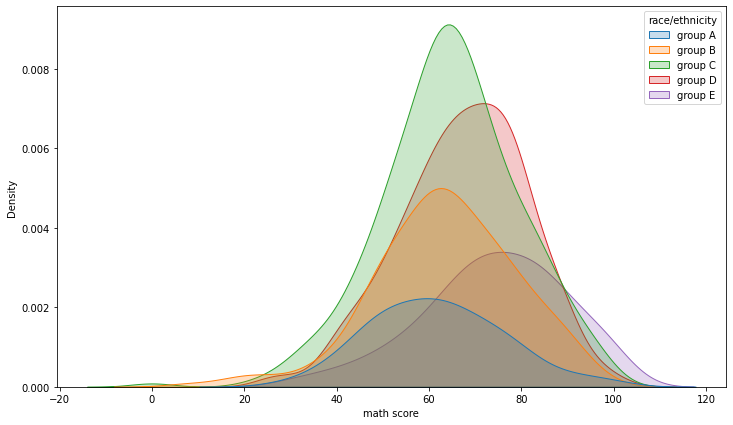

In [ ]:
# kdeplot 연속확률밀도

fig, ax = plt.subplots(figsize=(12, 7))
sns.kdeplot(x='math score', data=student, ax=ax,
            fill=True, 
            hue='race/ethnicity', 
            hue_order=sorted(student['race/ethnicity'].unique()))
#           bw_method=0.05,       # 얼마나 자세히 표현할 것인가
plt.show()

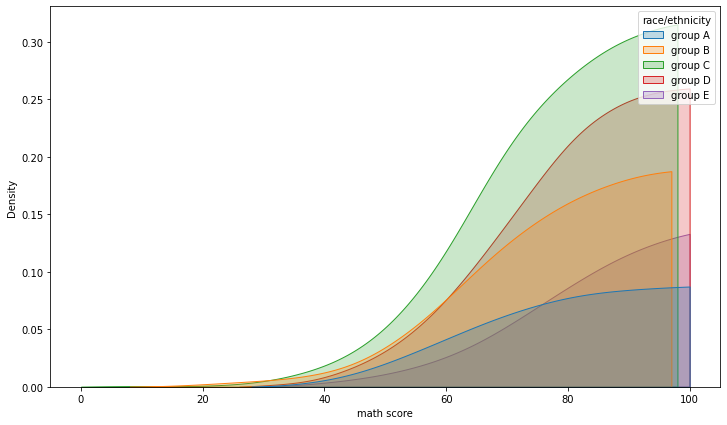

In [ ]:
# kdeplot 연속확률밀도

fig, ax = plt.subplots(figsize=(12, 7))
sns.kdeplot(x='math score', data=student, ax=ax,
            fill=True, 
            hue='race/ethnicity', 
            hue_order=sorted(student['race/ethnicity'].unique()),
            multiple="layer", # layer, stack, fill
            cumulative=True,
            cut=0,
           )
plt.show()

### Bivariate Distribution
2개 이상의 변수를 동시에 분포로 사용

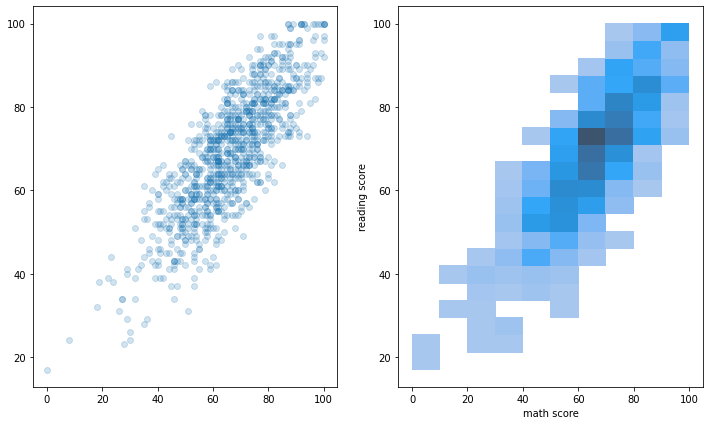

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
ax.set_aspect(1)

axes[0].scatter(student['math score'], student['reading score'], alpha=0.2)

sns.histplot(x='math score', y='reading score', 
             data=student, ax=axes[1],
#              color='orange',
             cbar=False,
             bins=(10, 20), 
            )

plt.show()

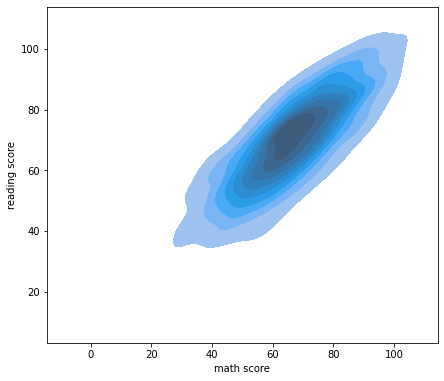

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_aspect(1)

sns.kdeplot(x='math score', y='reading score', 
             data=student, ax=ax,
            fill=True,
#             bw_method=0.1
            )

plt.show()

## Relation & Regression

### Scatter Plot

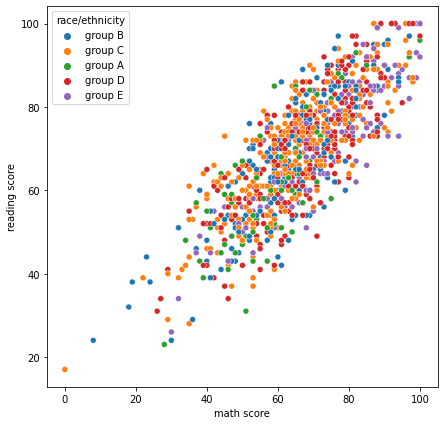

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x='math score', y='reading score', data=student,
#                style='gender', markers={'male':'s', 'female':'o'},
                hue='race/ethnicity', 
#                 size='writing score',
               )
plt.show()

In [ ]:
flights=sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
flights_wide=flights.pivot('year','month','passengers')
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


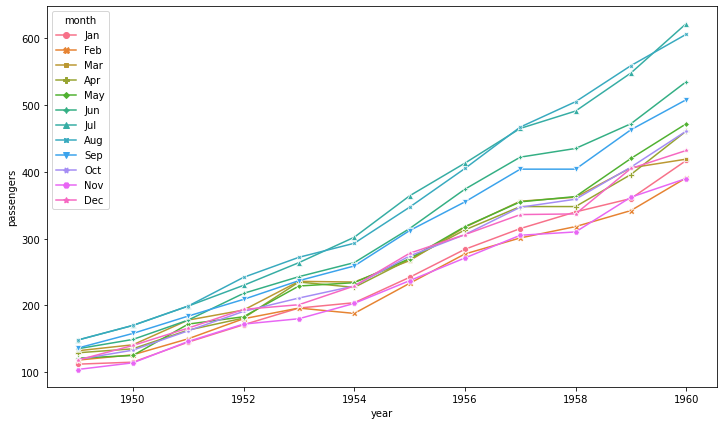

In [ ]:
# 연도별 데이터 보여줌 (hue 사용해서 표현)
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.lineplot(data=flights, x="year", y="passengers", hue='month', 
             style='month', markers=True, dashes=False,
             ax=ax)
plt.show()



## 회귀 모델

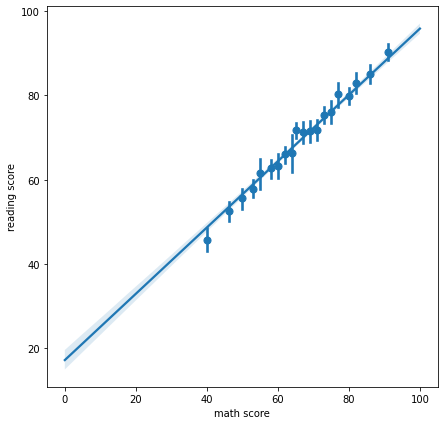

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.regplot(x='math score', y='reading score', data=student,
            x_estimator=np.mean, x_bins=20
           )
plt.show()

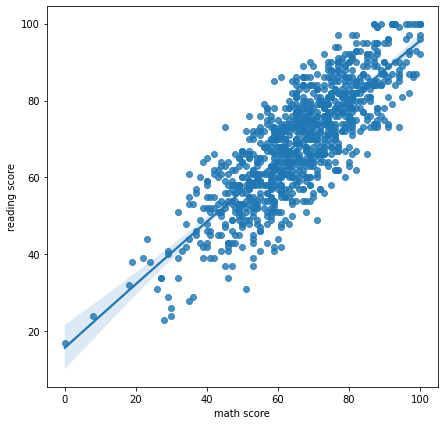

In [ ]:
# order 사용해서 다차원으로 보여줌

fig, ax = plt.subplots(figsize=(7, 7))
sns.regplot(x='math score', y='reading score', data=student,
            order=2
           )
plt.show()

## heatmap

In [ ]:
heart = pd.read_csv('/content/drive/MyDrive/부스트캠프/시각화/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


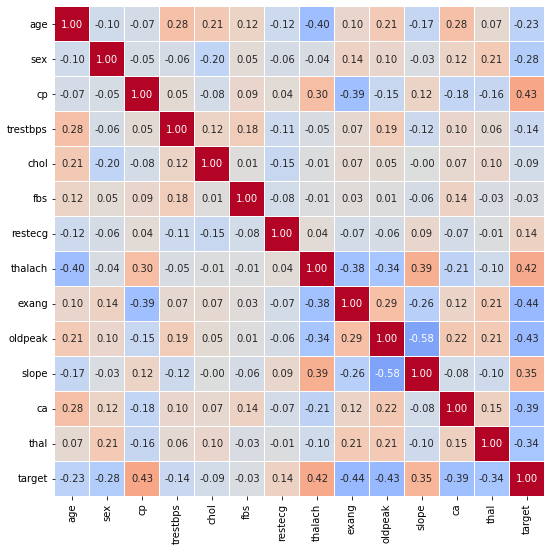

In [ ]:
fig, ax = plt.subplots(1,1 ,figsize=(10, 9))

mask = np.zeros_like(heart.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(heart.corr(), ax=ax,
           vmin=-1, vmax=1, center=0,     # vmin, vmax를 사용해서 색에 범위를 정해줌
            cmap='coolwarm',               # cmap을 사용해서 색의 형태 지정
            annot=True, fmt='.2f', # d     # annot 사용해서 글자 출력
            linewidth=0.1,                 # 칸마다 0.1만큼 띄어라
            square=True ,                  # 모든 칸을 사각형으로 만들어라
            #mask=mask                    # 반쪽만 보여라
           )
plt.show()


# 심화

## Joint Plot

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

student = pd.read_csv('/content/drive/MyDrive/부스트캠프/시각화/StudentsPerformance.csv')
iris = pd.read_csv('/content/drive/MyDrive/부스트캠프/시각화/Iris.csv')

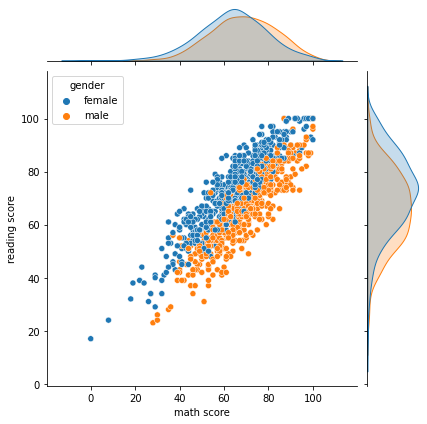

In [ ]:
sns.jointplot(x='math score', y='reading score',data=student,
              hue='gender', 
              kind='scatter', # { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” },  # 보여주는 방식
             )

## Pair Plot

2가지 변수를 사용하여 시각화 방법을 조정할 수 있습니다.

`kind`는 전체 서브플롯, `diag_kind`는 대각 서브플롯을 조정합니다.

- `kind` : {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
- `diag_kind` : {‘auto’, ‘hist’, ‘kde’, None}

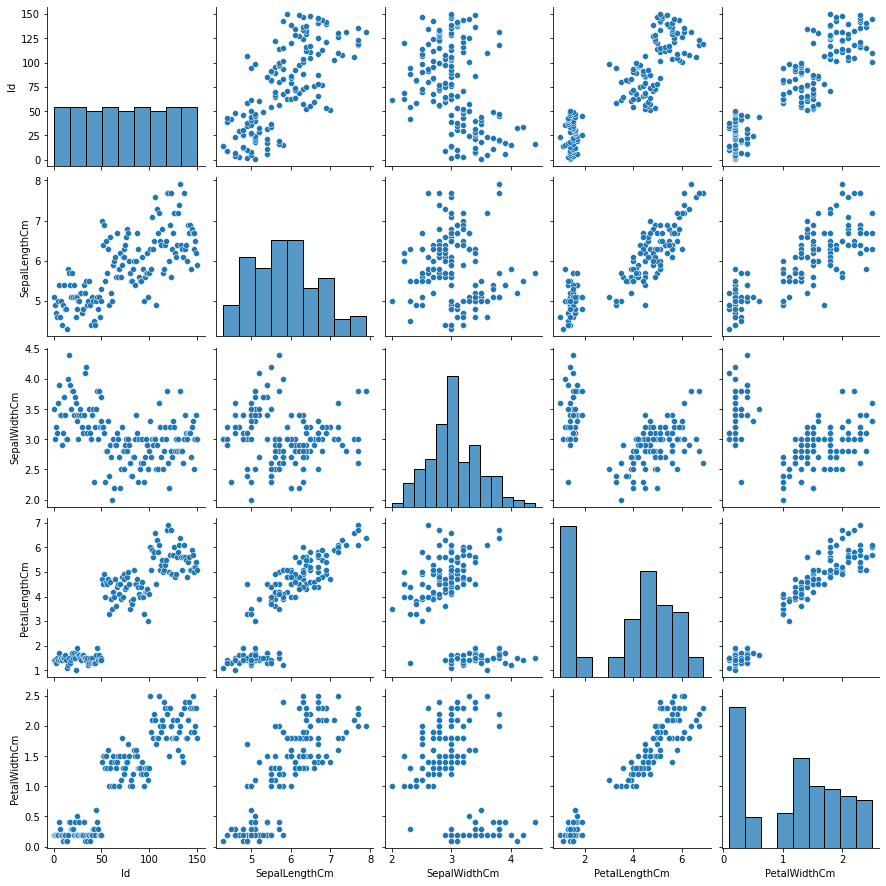

In [ ]:
sns.pairplot(data=iris)

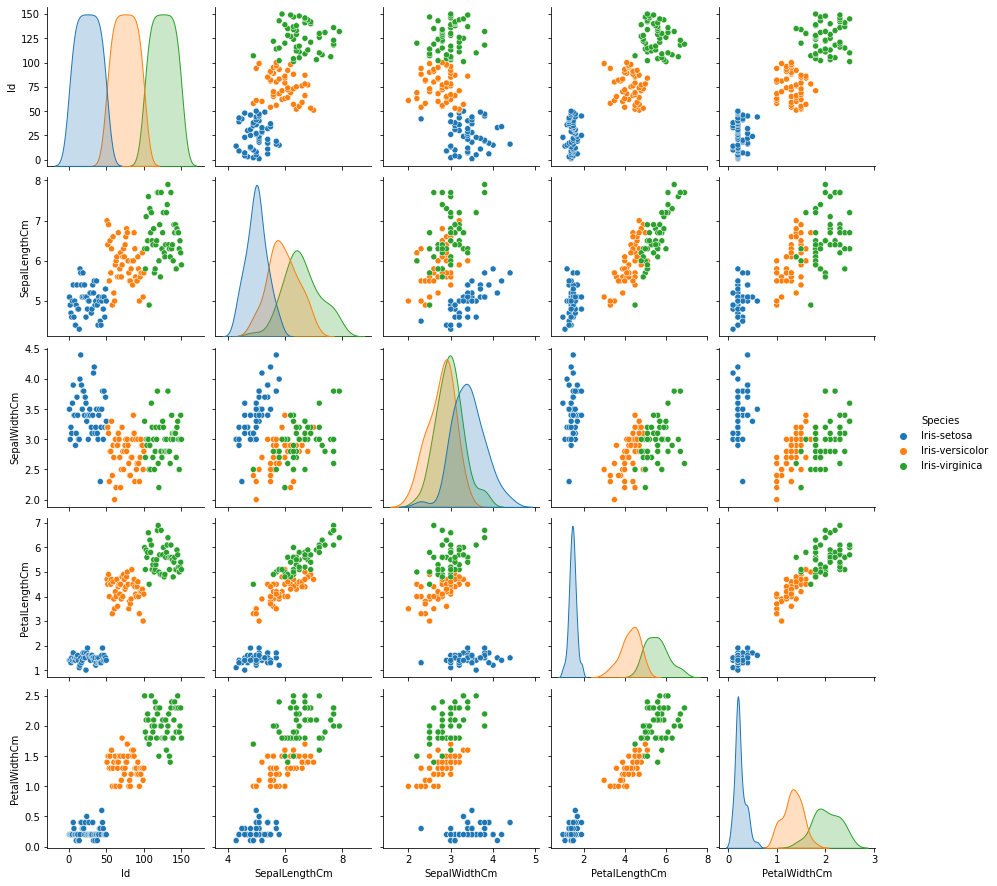

In [ ]:
sns.pairplot(data=iris, hue='Species')

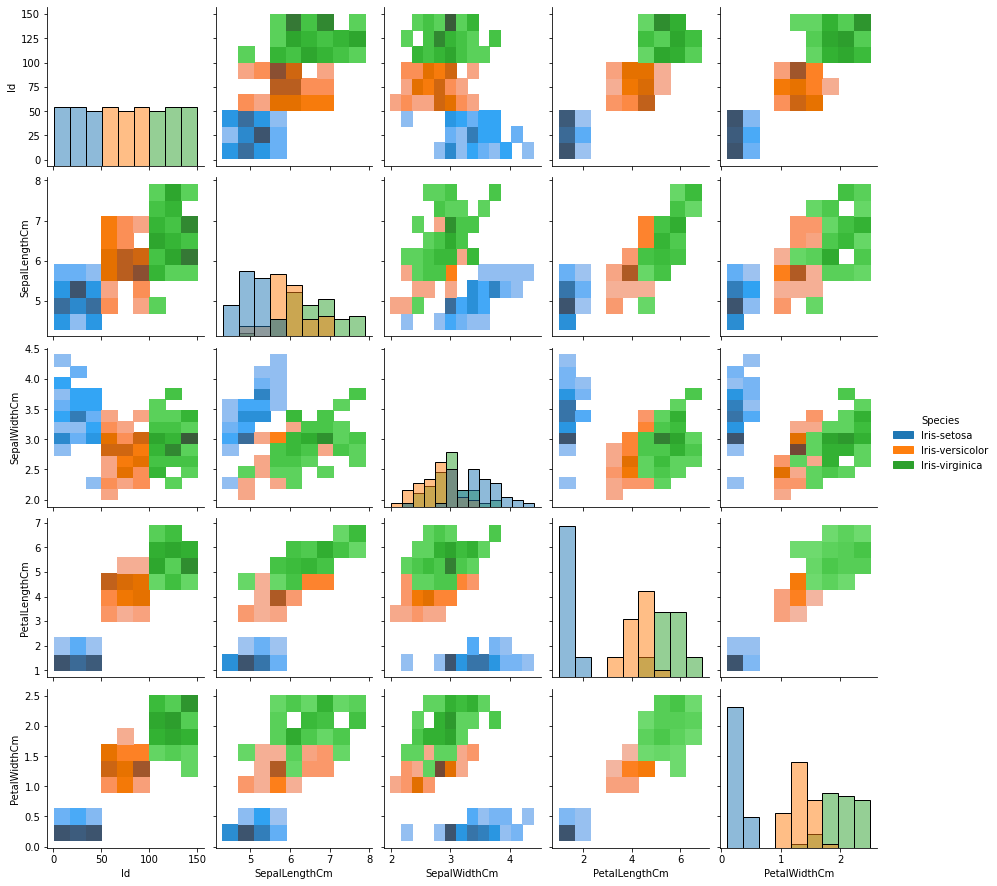

In [ ]:
sns.pairplot(data=iris, hue='Species', kind='hist')

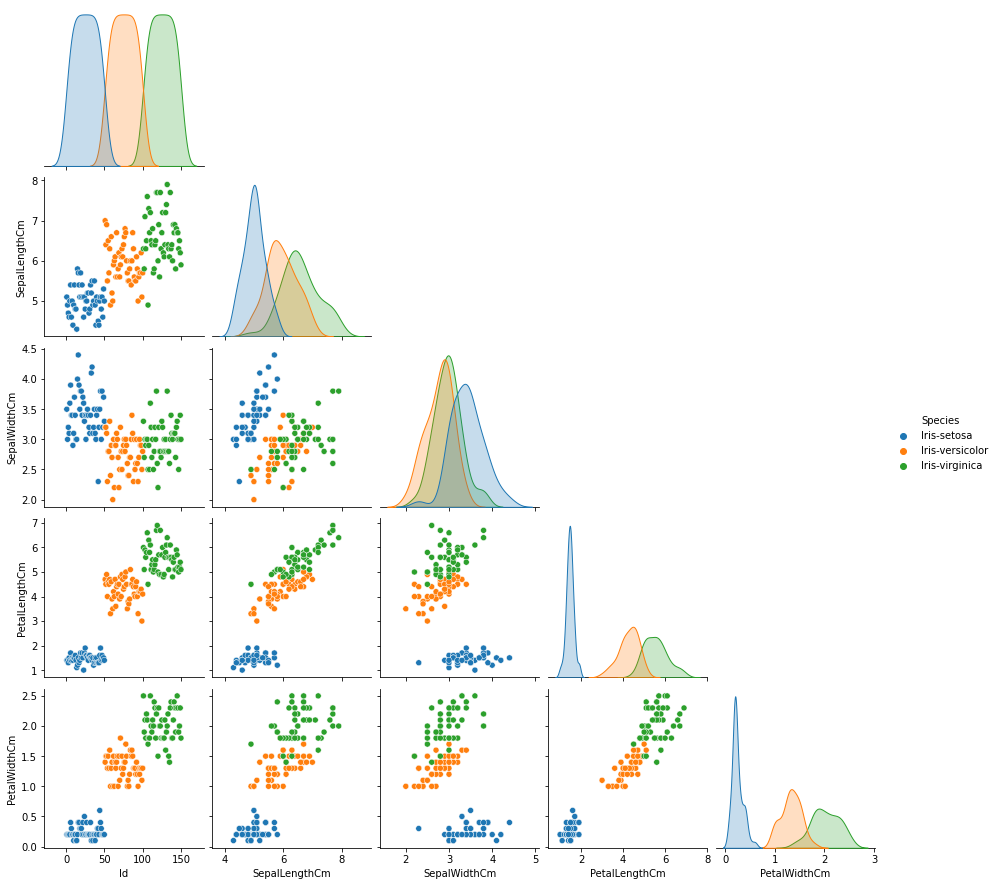

In [ ]:
sns.pairplot(data=iris, hue='Species', corner=True)

## Facet Grid
feature-feature 간의 관계 뿐만 아니라 feature category-feature category 간의 관계도 본다.

- `catplot` : Categorical 
- `displot` : Distribution
- `relplot` : Relational
- `lmplot` : Regression

### catplot
- Categorical scatterplots:
    - `stripplot()` (with `kind="strip"`; the default)
    - `swarmplot()` (with `kind="swarm"`)

- Categorical distribution plots:
    - `boxplot()` (with `kind="box"`)
    - `violinplot()` (with `kind="violin"`)
    - `boxenplot()` (with `kind="boxen"`)

- Categorical estimate plots:
    - `pointplot()` (with `kind="point"`)
    - `barplot()` (with `kind="bar"`)
    - `countplot()` (with `kind="count"`)


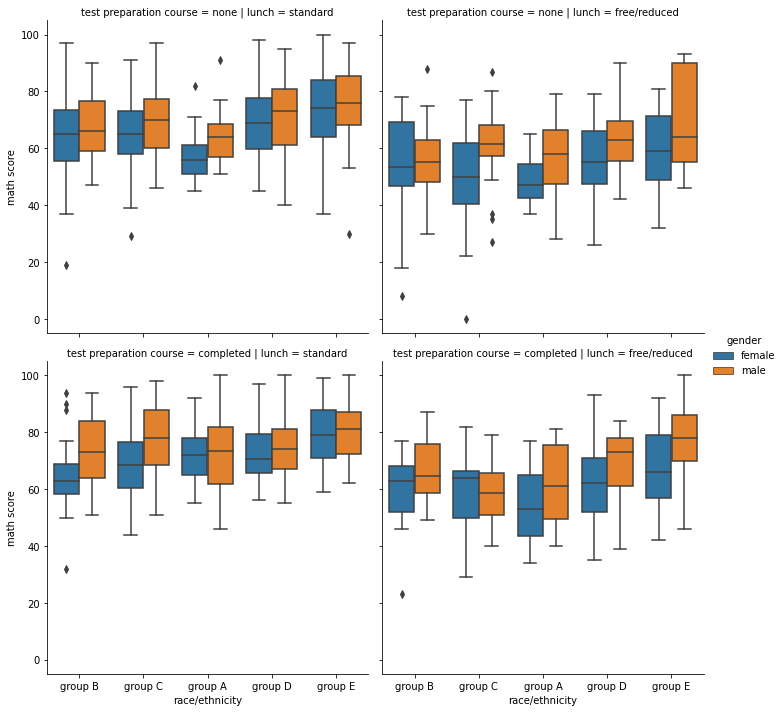

In [ ]:
sns.catplot(x="race/ethnicity", y="math score", hue="gender", data=student,
            kind='box', col='lunch', row='test preparation course'
            # 박스 형태로 보여라, column은 'lunch'이다. row는 'test preparation cours'이다.
           )